# Challenge 1

The heart disease dataset is a classic dataset that contains various health metrics (age, sex, chest pain type, blood pressure, cholesterol, etc.) related to diagnosing heart disease (binary classification: presence or absence of heart disease).

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (change the path if needed)
df = pd.read_csv('../data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We are going to try to predict the presence of heart disease suing this features, starting with a classical baseline method and trying to improve on that result with a series of ensembled approaches.

In [5]:
X = df.drop(columns="target")
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature scaling (for certain models, e.g., SVM or logistic regression, not always necessary for trees)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline model : decision Tree

We'll train a decision tree as our baseline model and evaluate it using accuracy.

In [53]:
#Create and Train a Decision Tree Classifier and print the train and test accuracy

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

# Create and Train a Decision Tree Classifier
# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
classifier.fit(X_train_scaled, y_train)

# Predictions and evaluation
# Make predictions on both the training and testing datasets
y_train_pred = classifier.predict(X_train_scaled)
y_test_pred = classifier.predict(X_test_scaled)

# Evaluate performance
# Compute accuracy for both training and testing datasets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"\nTraining Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 1.00
Testing Accuracy: 0.79


Number of Nodes in the Tree: 71
Depth of the Tree: 9



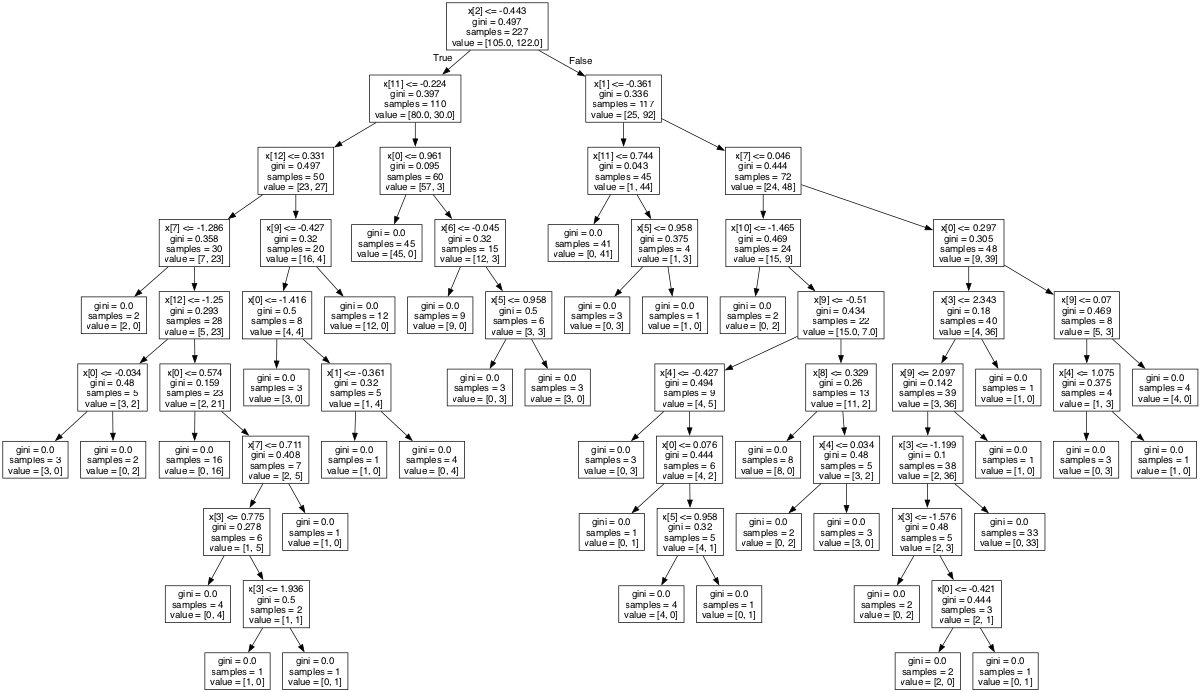

In [150]:
#Export Tree
import os
from sklearn import tree

dotfile = tree.export_graphviz(classifier, out_file = "heart_tree.dot")

os.system("dot -Tpng -Gdpi=50 heart_tree.dot -o heart_tree.png")

from IPython.core.display import Image

# Get the number of nodes and depth of the tree
num_nodes = classifier.tree_.node_count
tree_depth = classifier.tree_.max_depth
# Print the number of nodes and depth
print(f"Number of Nodes in the Tree: {num_nodes}")
print(f"Depth of the Tree: {tree_depth}")
print()

# Mostrar el PNG
Image("heart_tree.png")

We can see that this model is overfitting. This is expected, decision trees, especially deep ones  are notorious agressive at exploiting the data available. But that also makes them highly variant: a small change on the tree/data makes for potentially large changes in performance.

In [ ]:
# Run the same code again a couple of times. 
# You can see that the Train Accuracy is always 100% (overfitting) and the Test Accuracy is all over the place. 
# This is undesirable: our method is not generalizing and has high variance

In [120]:
# Create and Train a Decision Tree Classifier
# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
classifier.fit(X_train_scaled, y_train)

# Predictions and evaluation
# Make predictions on both the training and testing datasets
y_train_pred = classifier.predict(X_train_scaled)
y_test_pred = classifier.predict(X_test_scaled)

# Evaluate performance
# Compute accuracy for both training and testing datasets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 0.79


# Bagging: reducing variance

Bagging improves models because it reduces variance by averaging the predictions of multiple models trained on different subsets of the training data. This averaging effect reduces the sensitivity of the overall model to any one dataset or model, making the final prediction more stable and less prone to overfitting.

- High-variance models, like decision trees, tend to overfit the training data. This means that small changes in the training data can lead to large changes in the model’s predictions. For example, a decision tree trained on one subset of data might look completely different from a decision tree trained on another subset. This leads to high variance, where the model’s performance fluctuates a lot depending on the specific data it was trained on.
- Once all the individual models are trained, Bagging combines their predictions by averaging them (for regression) or using a majority vote (for classification). The key idea here is that the errors in each individual model are somewhat independent because they are trained on different bootstrap samples. Some models will make errors in one direction, while others might make errors in another. When you average these predictions, the errors cancel out, reducing the overall variability (variance) of the final model.

In [140]:
# Create and Train a BaggingClassifier. 
# Use as base estimator a weak decision tree (max_depth=1) and 100 estimators to really over a lot of different data samples
# Print the train and test accuracy

seed = 42

from sklearn.ensemble import BaggingClassifier

# Create and Train a BaggingClassifier
# Initialize the BaggingClassifier with a weak decision tree as base estimator
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=seed), # it's best with max_depth=5
    n_estimators=10,
    random_state=seed
)

# Train the BaggingClassifier on the training set
bagging_classifier.fit(X_train_scaled, y_train)

# Predictions and evaluation
# Make predictions on both the training and testing datasets
y_train_pred = bagging_classifier.predict(X_train_scaled)
y_test_pred = bagging_classifier.predict(X_test_scaled)

# Evaluate performance
# Compute accuracy for both training and testing datasets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.76
Testing Accuracy: 0.76


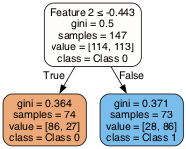

In [162]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

# Access the first decision tree in the ensemble
first_tree = bagging_classifier.estimators_[0]

# Export the tree to a DOT file
export_graphviz(
    first_tree,
    out_file="bagging_first_tree.dot",
    feature_names=[f'Feature {i}' for i in range(X_train_scaled.shape[1])],  # Placeholder names
    class_names=['Class 0', 'Class 1'],  # Replace with your actual class names if available
    filled=True,
    rounded=True,
    special_characters=True
)

# Convert the DOT file to a PNG
os.system("dot -Tpng -Gdpi=55 bagging_first_tree.dot -o bagging_first_tree.png")

# Display the image
Image("bagging_first_tree.png")

In [106]:
# # Export all trees in the bagging classifier

# for i, tree in enumerate(bagging_classifier.estimators_):
#     export_graphviz(
#         tree,
#         out_file=f"tree_{i}.dot",
#         feature_names=[f'Feature {i}' for i in range(X_train_scaled.shape[1])],  # Replace with actual feature names
#         class_names=['Class 0', 'Class 1'],  # Replace with actual class names
#         filled=True,
#         rounded=True,
#         special_characters=True
#     )
#     os.system(f"dot -Tpng tree_{i}.dot -o tree_{i}.png")
#     print(f"Tree {i} saved as tree_{i}.png")

You can probably see a modest improvement in score, but most importantly, the overfitting is mostly gone. This is because averaging over multiple datasets stabilizes the high variance of the base model. 

In [ ]:
# Run the same code again a couple of times. 
# You can see that consistently the Train Accuracy is close to the Test Accuracy. 

# Boosting: reducing bias

Now we’ll apply AdaBoost with decision trees as weak learners. This will sequentially improve the model by focusing on difficult cases.

Boosting reduces bias by sequentially training a series of weak learners (often simple models like decision trees) where each subsequent model focuses on the mistakes made by the previous models. The key idea behind boosting is to incrementally improve the model by correcting errors, which helps to reduce bias, especially when the initial model is too simple and underfits the data.

- Boosting typically uses weak learners, which are models that perform only slightly better than random guessing. For example, in classification, a weak learner might be a shallow decision tree (a "stump") with just a few levels. Weak learners usually have high bias, meaning they are too simplistic and don't capture the underlying patterns in the data well. As a result, they underfit the data.

- In each iteration, boosting trains a new model that tries to correct the errors made by the earlier models. If an instance was misclassified by the first weak learner, it will receive a higher weight, so the next model pays more attention to it. As the sequence of models progresses, the ensemble collectively focuses more on the difficult-to-predict instances. Over time, the combined models become better at fitting the data, as they successively reduce the bias (systematic error) by adjusting for earlier mistakes.

In [134]:
# Create and Train a AdaBoostClassifier. 
# Use as base estimator a weak decision tree (max_depth=1) and 100 estimators to really target the specific behaviors of this phenomenon
# Print the train and test accuracy

from sklearn.ensemble import AdaBoostClassifier

# Create and Train an AdaBoostClassifier
# Initialize the AdaBoostClassifier with a weak decision tree as base estimator
adaboost_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    algorithm='SAMME',  # Explicitly specify the algorithm
    random_state=0
)

# Train the AdaBoostClassifier on the training set
adaboost_classifier.fit(X_train_scaled, y_train)

# Task 5: Predictions and evaluation for AdaBoost
# Make predictions on both the training and testing datasets
y_train_pred_adaboost = adaboost_classifier.predict(X_train_scaled)
y_test_pred_adaboost = adaboost_classifier.predict(X_test_scaled)

# Task 6: Evaluate performance for AdaBoost
# Compute accuracy for both training and testing datasets
train_accuracy_adaboost = accuracy_score(y_train, y_train_pred_adaboost)
test_accuracy_adaboost = accuracy_score(y_test, y_test_pred_adaboost)

# Print the results for AdaBoost
print(f"AdaBoost - Training Accuracy: {train_accuracy_adaboost:.2f}")
print(f"AdaBoost - Testing Accuracy: {test_accuracy_adaboost:.2f}")

AdaBoost - Training Accuracy: 0.91
AdaBoost - Testing Accuracy: 0.87


You can probably see a good improvement in score, but overfitting rearing it's ugly head a gain (not as much as in the base model). This is because the iterative correction of adaboost really allows the model to focus on the specifics of this problem, at a cost of overexploiting the dataset.

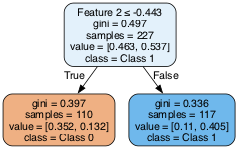

In [164]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np

# Access the first decision tree in the ensemble
first_tree = adaboost_classifier.estimators_[0]

# Export the tree to a DOT file
export_graphviz(
    first_tree,
    out_file="adaboost_first_tree.dot",
    feature_names=[f'Feature {i}' for i in range(X_train_scaled.shape[1])],  # Placeholder names
    class_names=['Class 0', 'Class 1'],  # Replace with your actual class names if available
    filled=True,
    rounded=True,
    special_characters=True
)

# Convert the DOT file to a PNG
os.system("dot -Tpng -Gdpi=55 adaboost_first_tree.dot -o adaboost_first_tree.png")

# Display the image
Image("adaboost_first_tree.png")

In [ ]:
# Run the same code again a couple of times. 
# You can see that the test Accuracy will mostly be pretty good, even if some times it get's lower or higher scores (high variance, low bias)
# You can see also that consistently the Train Accuracy is higher than the Test Accuracy,indicating some (not extreme) overfitting 